In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/hammettdata.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

df["logk"] = np.log10(df["k_obs"])

df

,Reactant,X,Y,Z,sum_sigma,sum_sigma_plus,k_obs,logk
0,1,H,p-Cl,p-Cl,0.46,0.22,0.096,-1.017729
1,2,m-CF3,H,H,0.43,0.43,0.052,-1.283997
2,3,m-Cl,H,H,0.37,0.37,0.100,-1.000000
3,4,H,p-Cl,H,0.23,0.11,0.300,-0.522879
4,5,m-OCH3,H,H,0.12,0.12,0.740,-0.130768
5,6,H,H,H,0.00,0.00,1.000,0.000000
6,7,m-CH3,H,H,-0.07,-0.07,1.480,0.170262
7,8,H,p-CH3,H,-0.17,-0.31,3.270,0.514548
8,9,H,p-OCH3,H,-0.27,-0.78,0.560,-0.251812
9,10,H,p-CH3,p-CH3,-0.34,-0.62,5.800,0.763428


2.7625866175213183 2.2249617496959884 0.958614053353119
-2.567636420925082 -0.12958991182686613 0.9064879815740957


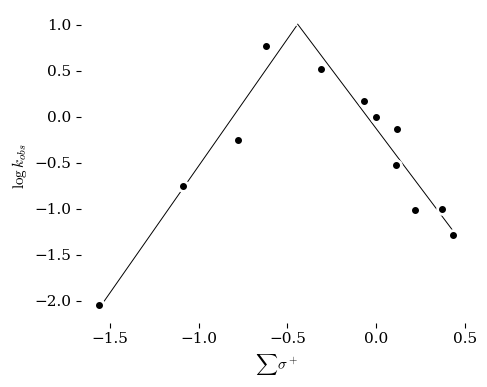

In [28]:
#x = df["sum_sigma"][0:8].append(df["sum_sigma_plus"][8:12])

x = df["sum_sigma_plus"]
y = df["logk"]

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

########################
### Cut out the left side and plot line
########################

x1 = df["sum_sigma_plus"][8:12]
y1 = df["logk"][8:12]


line = linregress(x1,y1)
slope = line.slope
r  =line.rvalue
int = line.intercept
print(slope, int, r**2)

step = 0.01
x_list = np.arange(np.min(x), -0.44173604829285634, step)
y_list = x_list*slope+int
ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)

########################
### Cut out the right side and plot line
########################

x1 = df["sum_sigma_plus"][0:8]
y1 = df["logk"][0:8]


line = linregress(x1,y1)
slope = line.slope
r  =line.rvalue
int = line.intercept
print(slope, int, r**2)

step = 0.01
x_list = np.arange(-0.44173604829285634, np.max(x)+step, step)
y_list = x_list*slope+int
ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)

########################
### Plot the data    ###
########################

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=r"$\sum \sigma^+$",
#          xlim=[0,13],                  
#          ylim=[-2,3]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/plot_fig1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots